<a href="https://colab.research.google.com/github/linapaper/Bank-Management/blob/main/practica_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traducción de datos y variables

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv("credit_card.csv")

In [ ]:
dic_columnas = {
    'LIMIT_BAL' : 'limite',
    'CHECKING_ACCOUNT' : 'cuenta_corriente',
    'EDUCATION' : 'escolaridad',
    'MARRIAGE' : 'estado_civil',
    'AGE' : 'edad',
    'BILL_AMT' : 'valor_factura',
    'PAY_AMT' : 'valor_pago',
    'DEFAULT' : 'moroso'
}

In [ ]:
tarjetas = datos.rename(columns = dic_columnas)

In [ ]:
tarjetas.cuenta_corriente.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dic_cuenta = {
    'Yes' : 'Si',
    'No' : 'No'
}

In [ ]:
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta)

In [ ]:
tarjetas.escolaridad.unique()
dic_escolaridad = {
    '2.University' : '2.Universidad',
    '3.Graduate School' : '3.Pos-graduación',
    '1.High School' : '1.Colegio'
}
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)

In [ ]:
tarjetas.estado_civil.unique()
dic_estado_civil = {
    'Married' : 'Casado/a',
    'Single' : 'Soltero/a'
}
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)

In [ ]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


#Trabajando con seaborn

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [ ]:
tarjetas.shape

(1500, 8)

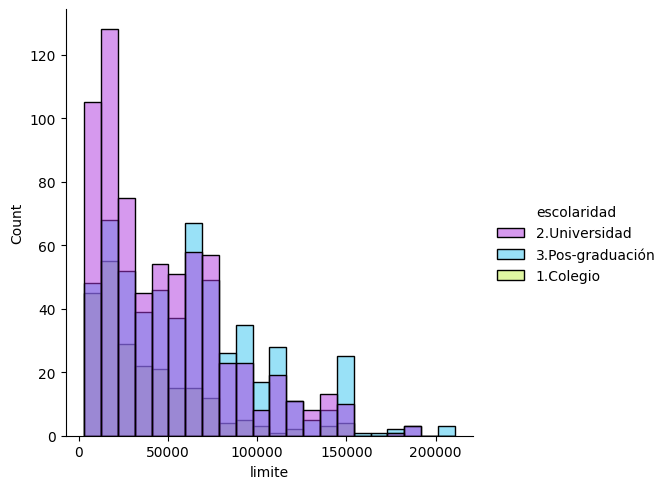

In [ ]:
mi_paleta = ["#AE35DF", "#34C5F0", "#C2F047" ]
sns.displot(data = tarjetas, x='limite', hue= 'escolaridad', palette= mi_paleta)

#Analisis 2

In [ ]:
sns.set_style('darkgrid')

In [ ]:
tarjetas['iu'] = tarjetas['valor_factura'] / tarjetas['limite']

In [ ]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


In [ ]:
tarjetas['porcentaje_uso'] = (tarjetas['iu'] * 100).round(2)

In [ ]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,porcentaje_uso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,15.51
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,1.44
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,15.59
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,96.47
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,82.40


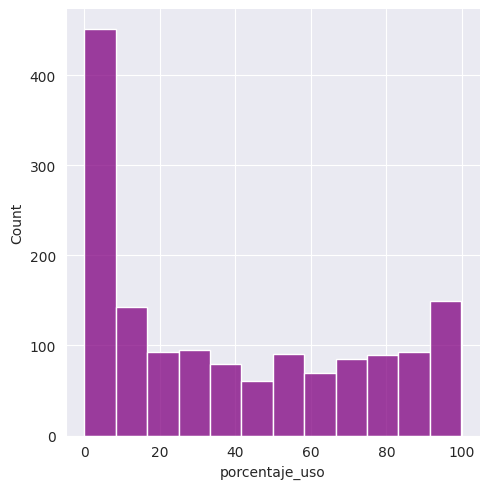

In [ ]:
sns.displot(data = tarjetas, x = 'porcentaje_uso', color='purple')

Hay un público significativo que usa en muy poca forma su tarjeta.

#Analisis de variables categóricas

<Axes: xlabel='cuenta_corriente', ylabel='count'>

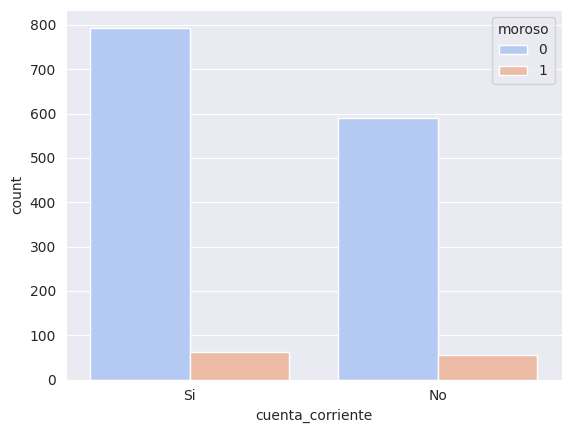

In [ ]:
sns.countplot(x= 'cuenta_corriente', data = tarjetas, hue = 'moroso', palette= 'coolwarm')

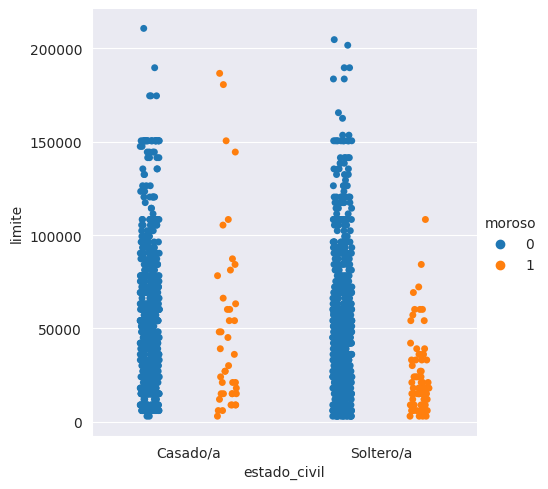

In [ ]:
sns.catplot(x='estado_civil', y= 'limite', data= tarjetas, hue='moroso', dodge= True)

<ipython-input-60-4224c32f5d88>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='escolaridad', y='iu', data=tarjetas, marker='o', palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


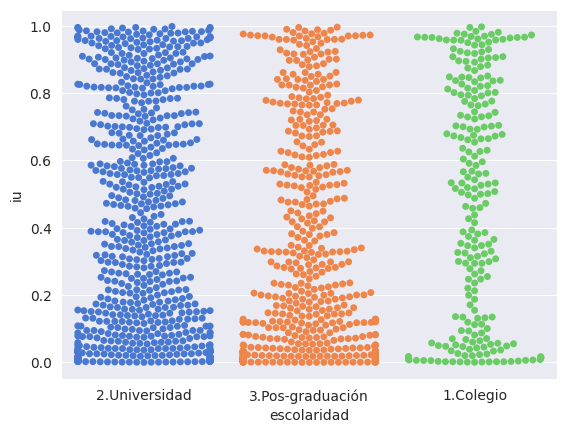

In [ ]:
sns.swarmplot(x='escolaridad', y='iu', data=tarjetas, marker='o', palette='muted')

<Axes: xlabel='escolaridad', ylabel='iu'>

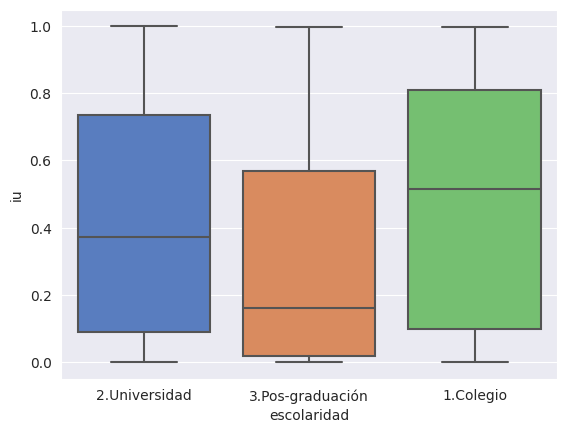

In [ ]:
sns.boxplot(x='escolaridad', y='iu', data=tarjetas, palette='muted')

<Axes: xlabel='escolaridad', ylabel='iu'>

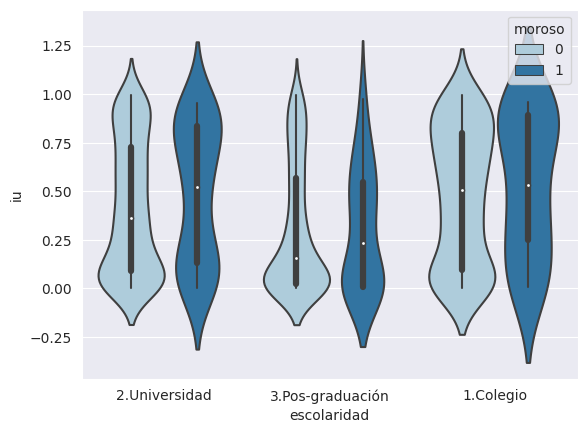

In [ ]:
sns.violinplot(x='escolaridad', y='iu', data=tarjetas, palette='Paired', hue='moroso')

In [ ]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,porcentaje_uso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,15.51
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,1.44
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,15.59
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,96.47
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,82.40


In [ ]:
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72])

In [ ]:
grupo = [20, 30, 40, 50, 100]
nombres = ['20-30', '30-40', '40-50', '50+']

tarjetas['rango_edad']= pd.cut(tarjetas['edad'], grupo, labels=nombres)
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,porcentaje_uso,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,15.51,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,1.44,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,15.59,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,96.47,30-40
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,82.40,20-30


<Axes: xlabel='rango_edad', ylabel='limite'>

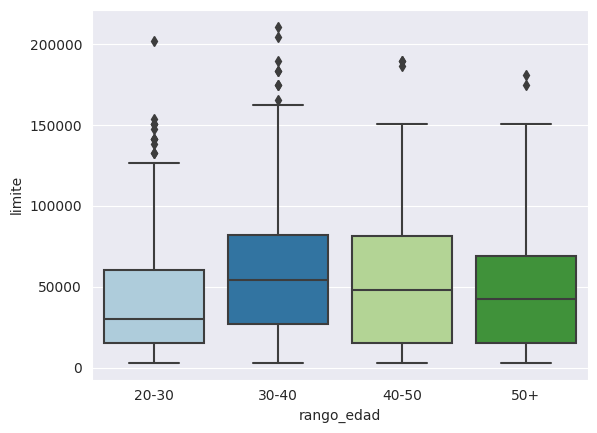

In [ ]:
sns.boxplot(x='rango_edad', y= 'limite', data=tarjetas, palette='Paired')

In [ ]:
rango = [0, 25, 50, 75, 100]
names = ['0%-25%', '25%-50%', '50%-75%', '75%-100%']

tarjetas['rango_iu'] = pd.cut(tarjetas['porcentaje_uso'], rango, labels=names)
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,porcentaje_uso,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,15.51,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,1.44,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,15.59,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,96.47,30-40,75%-100%
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,82.40,20-30,75%-100%


<Axes: xlabel='rango_edad', ylabel='count'>

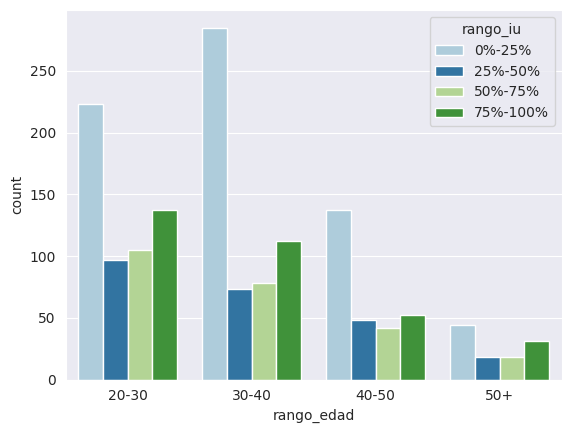

In [ ]:
sns.countplot(x='rango_edad', data=tarjetas, palette='Paired', hue='rango_iu')

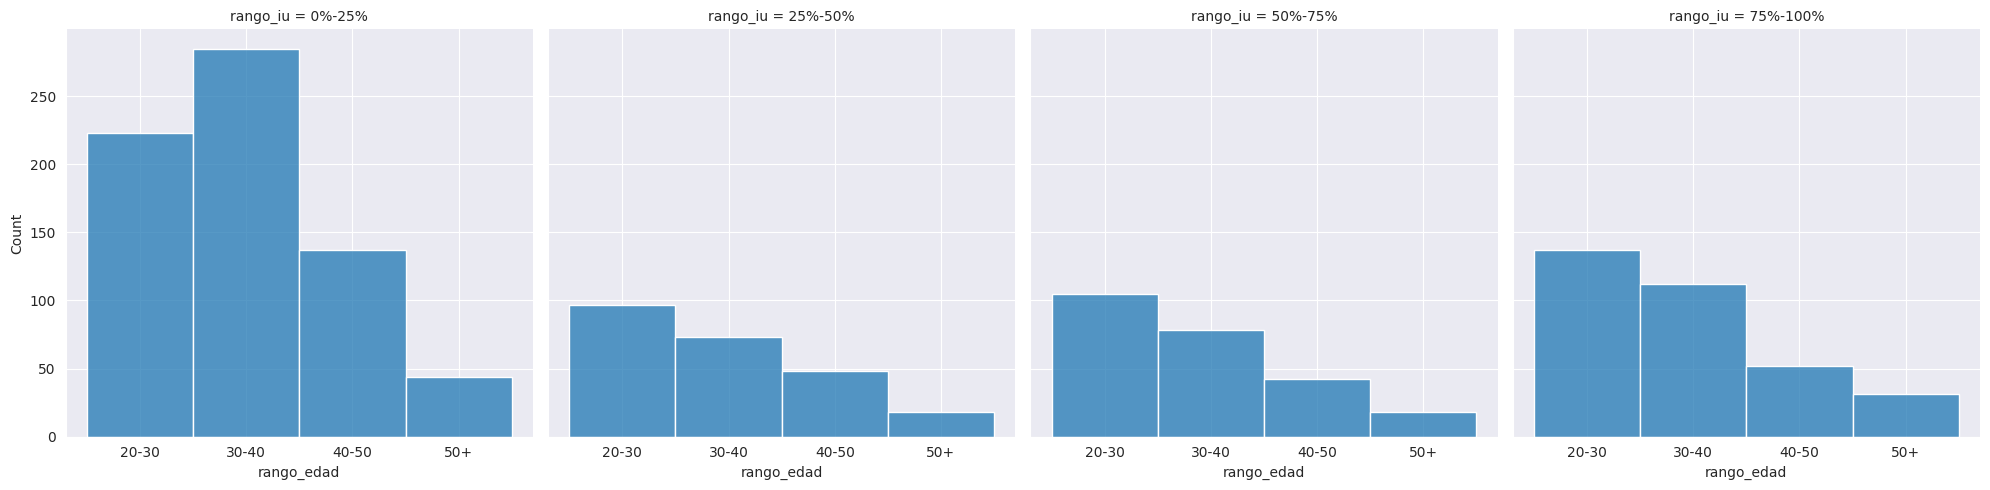

In [ ]:
sns.displot(x='rango_edad', data=tarjetas, col='rango_iu')

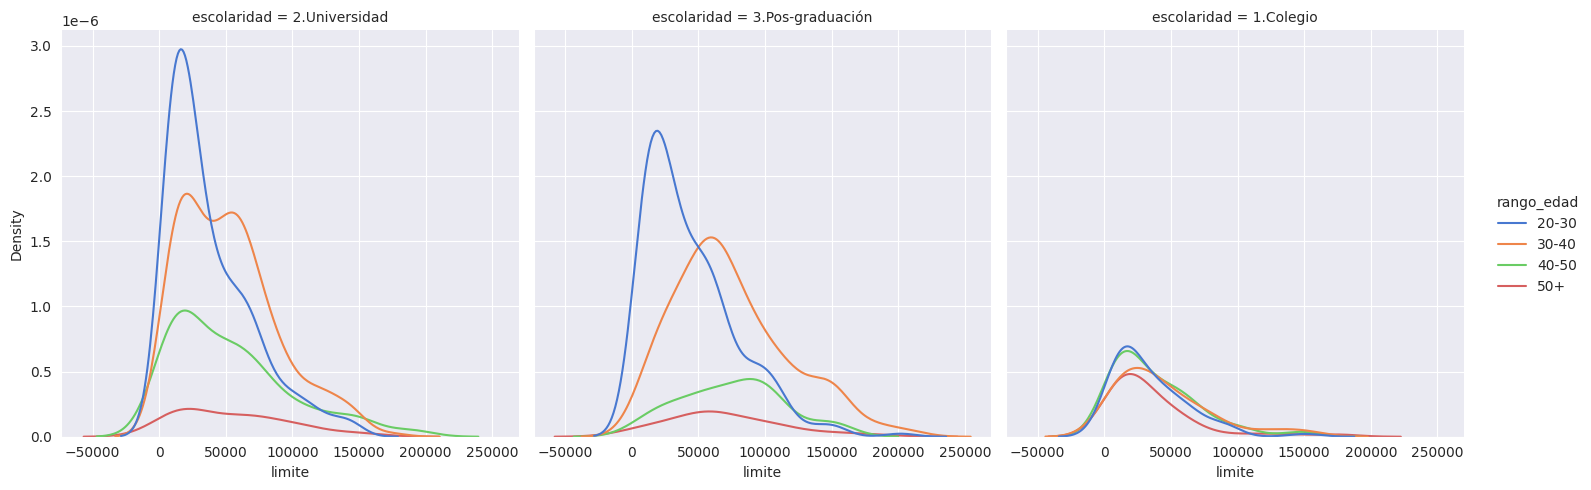

In [ ]:
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind='kde', hue='rango_edad', palette='muted')

#Dispersión

<ipython-input-87-2a134a4725ee>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente', palette= mi_paleta);


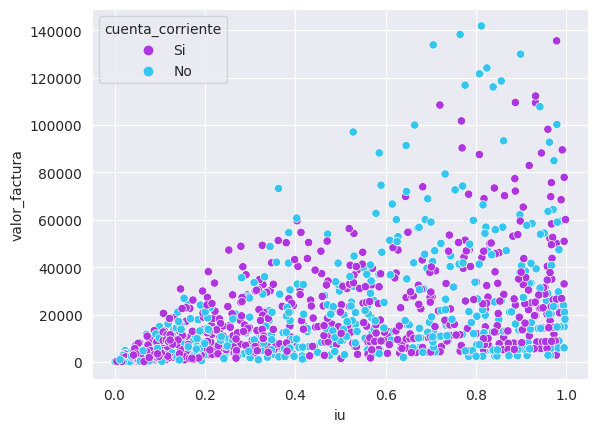

In [ ]:
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente', palette= mi_paleta);

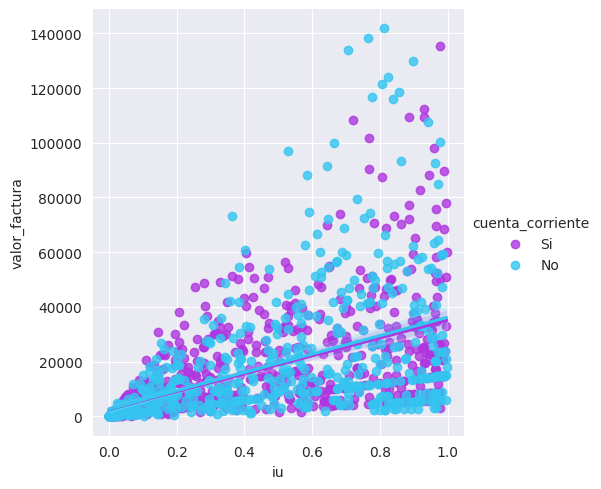

In [ ]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente', palette= mi_paleta);

# Test de hipótesis

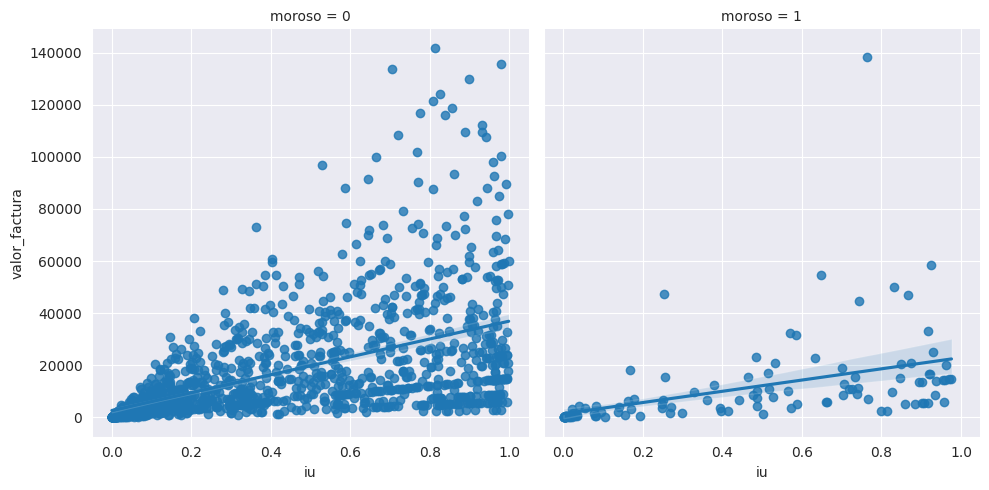

In [ ]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, col='moroso');

In [ ]:

from scipy.stats import ranksums

H<sup>null<sup>

La distribución de los grupos moroso y no moroso es la misma

H<sup>alt<sup>

La distribución de los grupos moroso y no moroso no es la misma

In [ ]:
moroso = tarjetas.query("moroso == 1").valor_factura
moroso = moroso.round(2)
moroso

0         934.01
1         519.40
38      10891.09
45        330.61
47       7316.73
          ...   
1448     1619.01
1472    17048.28
1475     4402.08
1478     1851.16
1495      295.08
Name: valor_factura, Length: 117, dtype: float64

In [ ]:
no_moroso = tarjetas.query("moroso == 0").valor_factura

no_moroso = no_moroso.round(2)
no_moroso

2         4223.53
3        14522.96
4       124060.13
5          114.42
6         4244.31
          ...    
1494     32698.26
1496     23637.86
1497       962.92
1498       864.76
1499     97022.85
Name: valor_factura, Length: 1383, dtype: float64

In [ ]:
resultado = ranksums(moroso, no_moroso)

In [ ]:
print("El p_value de nuestro test es {}".format(resultado.pvalue))

El p_value de nuestro test es 0.010391243081223555


#Jointplot

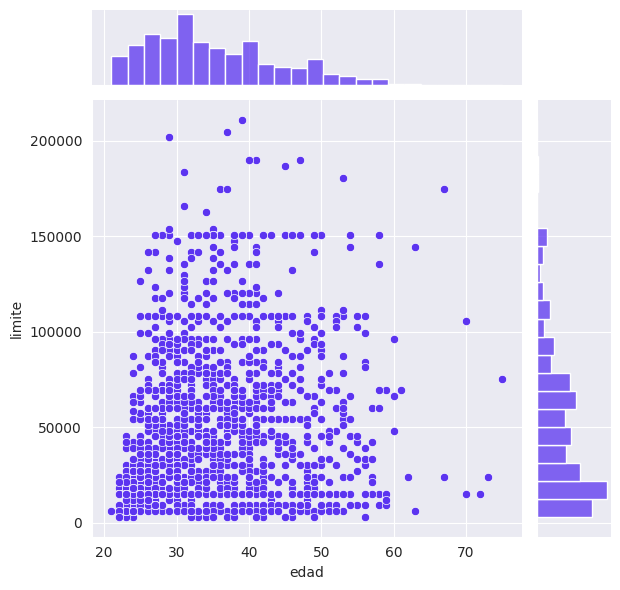

In [ ]:
sns.jointplot(x='edad', y='limite', data=tarjetas, color= '#5C34F0');

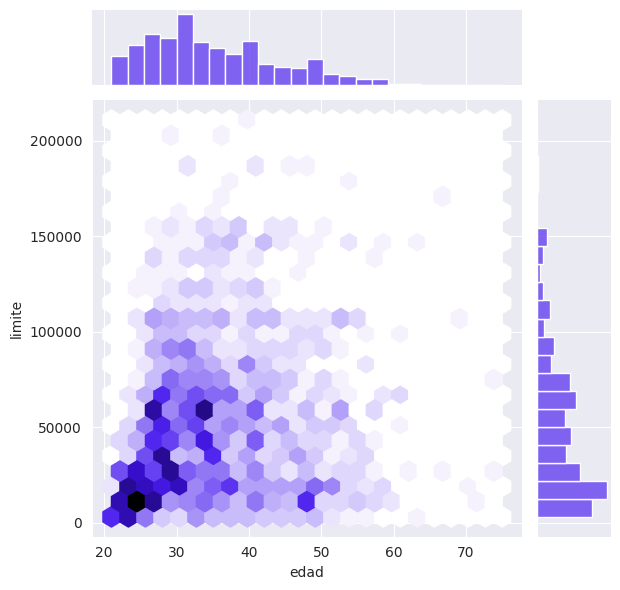

In [ ]:
sns.jointplot(x='edad', y='limite', data=tarjetas, color= '#5C34F0', kind='hex');

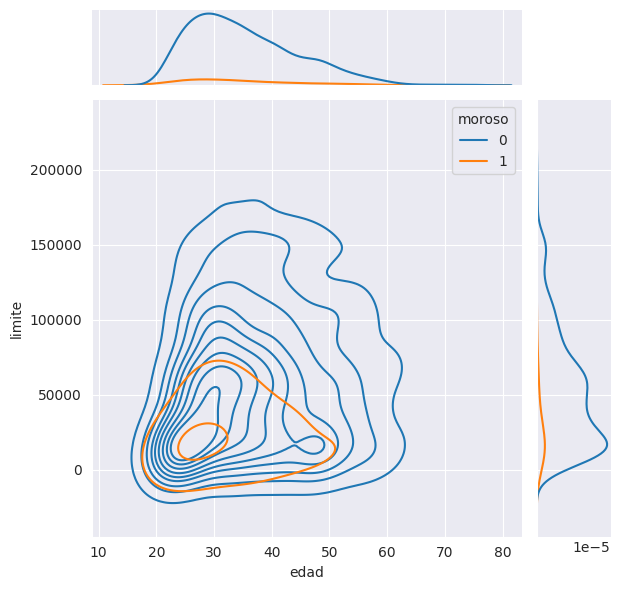

In [ ]:
sns.jointplot(x='edad', y='limite', data=tarjetas, color= '#5C34F0', kind='kde', hue='moroso');

#Pairplot

In [ ]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu,porcentaje_uso
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237,38.823707
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923,34.192225
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188,0.020000
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209,4.920000
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976,30.900000
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090,70.407500
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010,99.800000


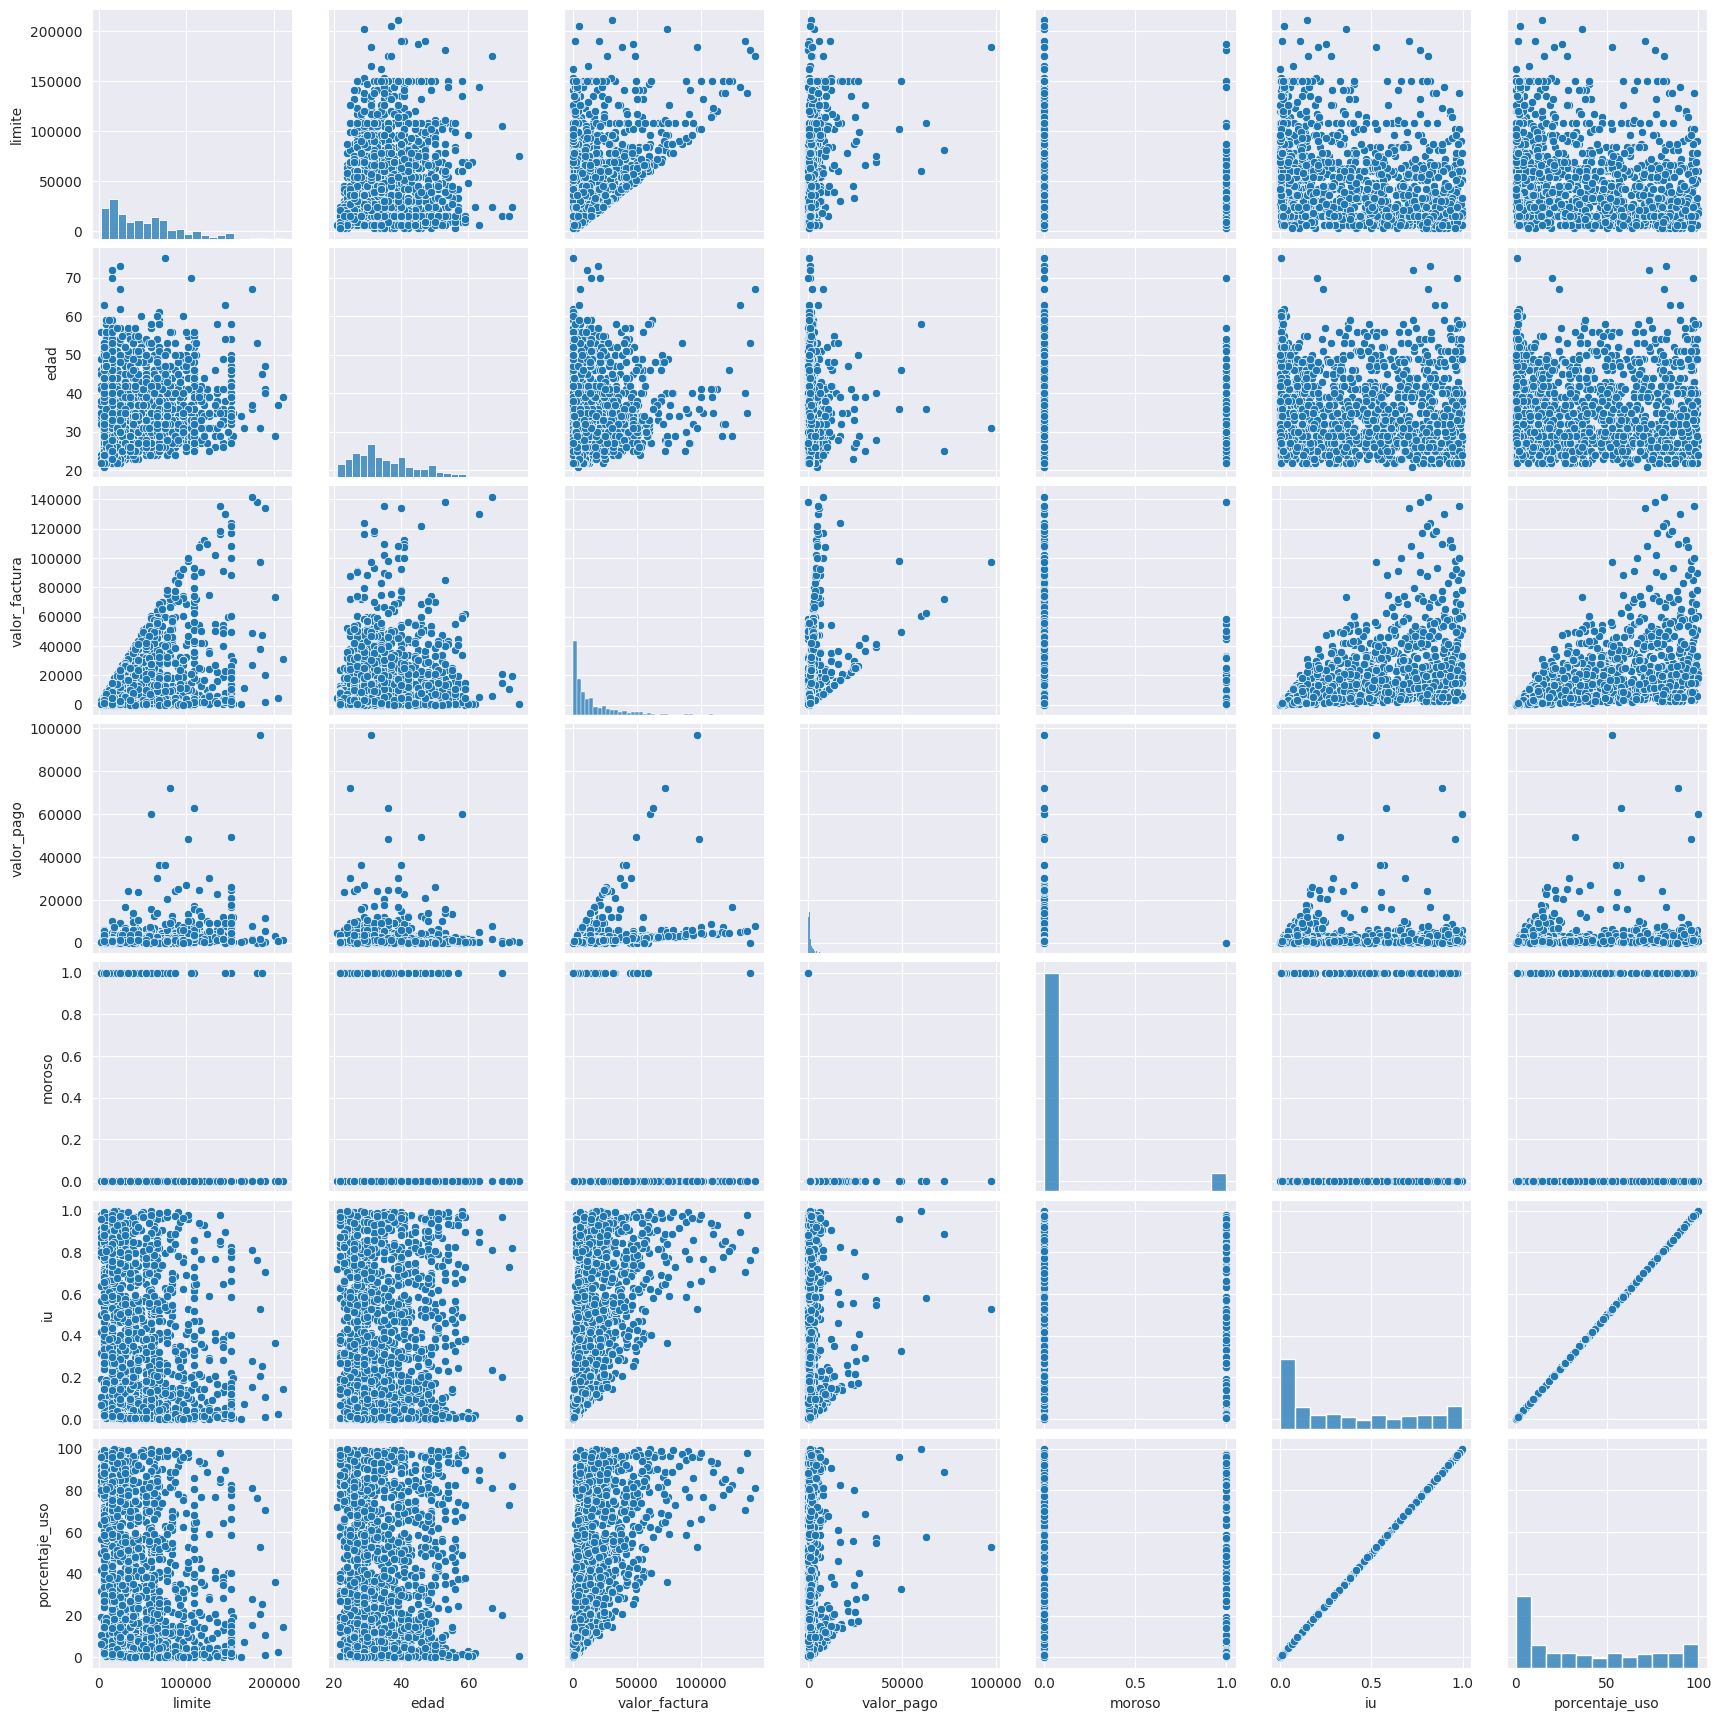

In [ ]:
sns.pairplot(data=tarjetas);

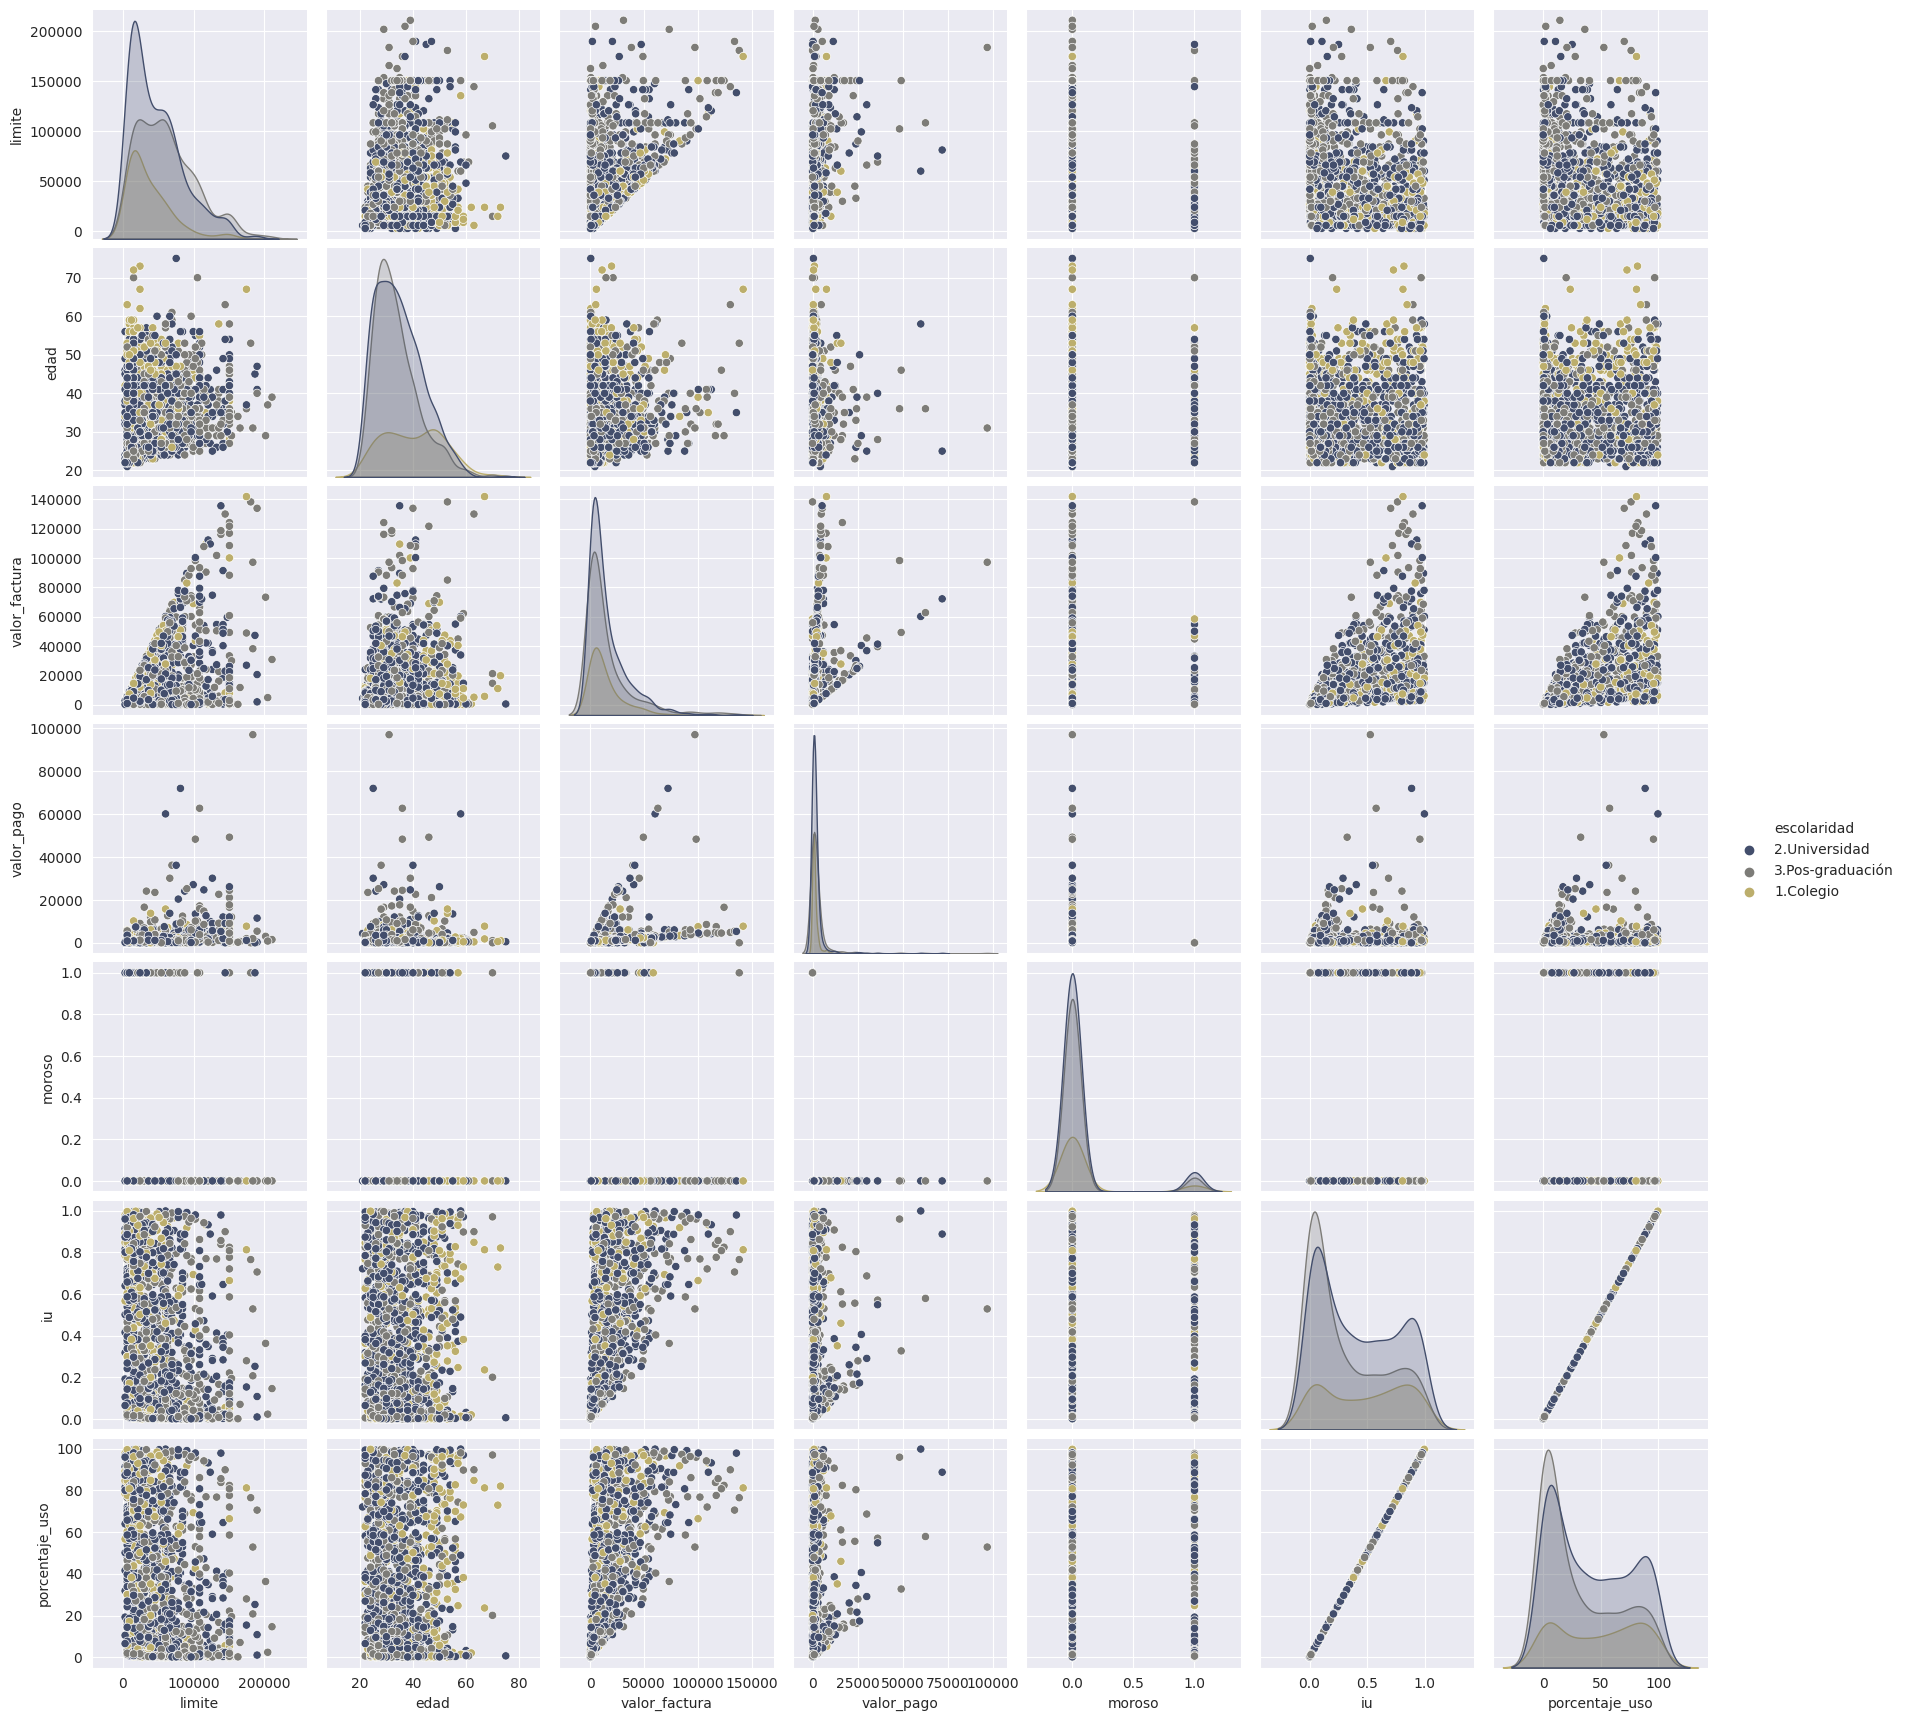

In [ ]:
sns.pairplot(data=tarjetas,hue='escolaridad', palette='cividis');